<a href="https://colab.research.google.com/github/HIDDENDEN/Math_models/blob/main/MyWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing template ...


In [31]:
# !cp "drive/My Drive/Science_res/TestClass.py" .
# import TestClass


In [32]:
# test = TestClass.Vehicle(1,1,1)

In [33]:
# print(test.brake())

import my classes

In [34]:
!cp "drive/My Drive/Science_res/At.py" .
import At

!cp "drive/My Drive/Science_res/Fiu.py" .
import Fiu

!cp "drive/My Drive/Science_res/Alphax.py" .
import Alphax

!cp "drive/My Drive/Science_res/Kcit.py" .
import Kcit


initialize functions

In [35]:
a_t = At.A_t()
kci_t = Kcit.Kci_t()
fi_u = Fiu.Fi_t()
alpha_x = Alphax.Alpha_x()

Import needed libs

In [36]:
import numpy as np


Set steps size of X axys and T axys


And *x_0* , *t_0*

In [37]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_y = 10
L = 1
T = 1
N_x = 10
N_y = 10

h_x = L/N_x
h_t = T/N_y

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

**Initialize two dim matrix for data storage**

In [38]:
matrix = np.zeros((N_x + 1,N_y + 1))

**Filling matrix with border conditions**

In [39]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix[0][j] = alpha_x.compute(x_0 + h_x*j)

# First colomn filled with kci(t_i)
for i in range(0, N_y+1):
  matrix[i][0] = kci_t.compute(t_0 + h_t*i)

# print(matrix)

*Define function for matrix computing*

In [40]:
def calculate_node(i,j,const_steps,x_i,t_j,matrix):
  return (const_steps * (matrix[i][j-1]/h_t + matrix[i-1][j]/h_x - a_t.compute(t_j-h_t)*fi_u.compute(matrix[i-1][j-1]) ) )


**Compute whole matrix**

In [41]:
# Let 1/((1/h_t) + (1/h_x)) be written as const_steps
const_steps = 1/(1/h_t + 1/h_x)

for i in range(1, N_y + 1):
  for j in range(1, N_x + 1):
    matrix[i][j] = round( calculate_node(i,j,const_steps, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma
print(matrix)

[[0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.   ]
 [0.1   0.1   0.145 0.213 0.292 0.376 0.463 0.552 0.641 0.73  0.82 ]
 [0.2   0.145 0.14  0.169 0.22  0.283 0.354 0.43  0.508 0.587 0.667]
 [0.3   0.213 0.169 0.162 0.183 0.222 0.274 0.334 0.4   0.468 0.538]
 [0.4   0.292 0.22  0.183 0.175 0.189 0.22  0.263 0.315 0.372 0.432]
 [0.5   0.376 0.283 0.222 0.189 0.18  0.191 0.216 0.252 0.296 0.345]
 [0.6   0.463 0.354 0.274 0.22  0.191 0.182 0.189 0.21  0.24  0.278]
 [0.7   0.552 0.43  0.334 0.263 0.216 0.189 0.18  0.186 0.202 0.228]
 [0.8   0.641 0.508 0.4   0.315 0.252 0.21  0.186 0.177 0.18  0.194]
 [0.9   0.73  0.587 0.468 0.372 0.296 0.24  0.202 0.18  0.171 0.174]
 [1.    0.82  0.667 0.538 0.432 0.345 0.278 0.228 0.194 0.174 0.165]]


In [42]:
# print((matrix[:][1]))
# print((matrix[:][1])[3])

**Drawing section**

In [43]:
# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  


*Drawing for U(x, t_const)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


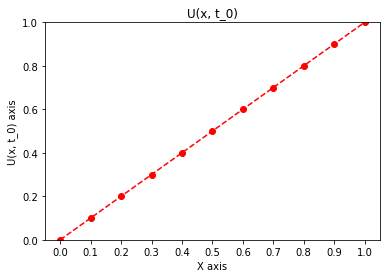

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


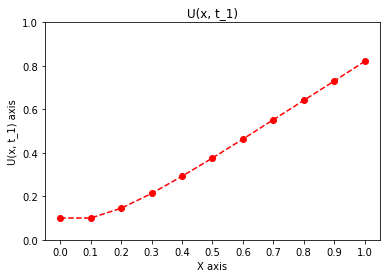

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


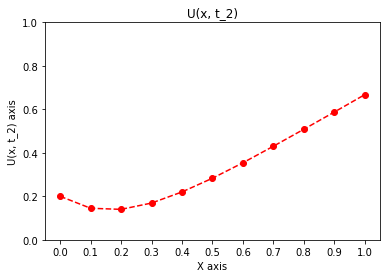

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


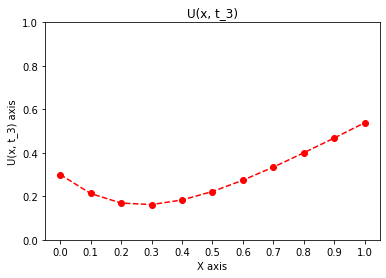

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


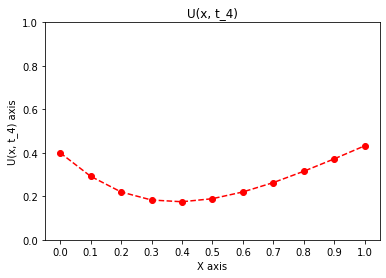

In [47]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  axes.set_ylim([0, 1])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "red")
  plt.show()



*Drawing for U(x_const, t)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


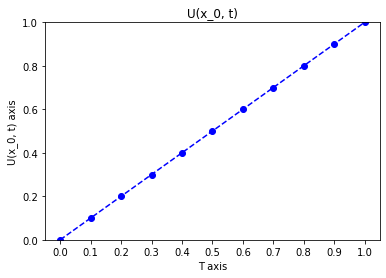

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


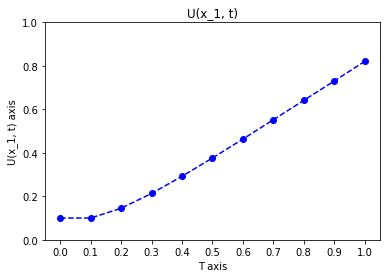

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


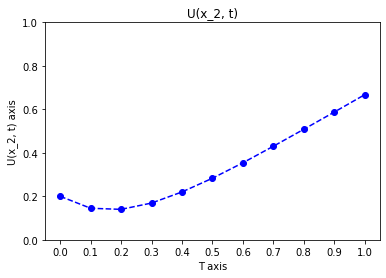

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


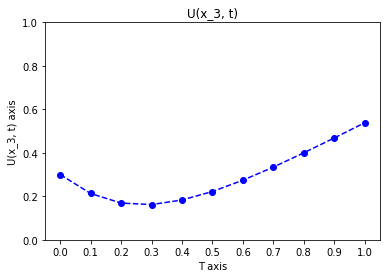

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


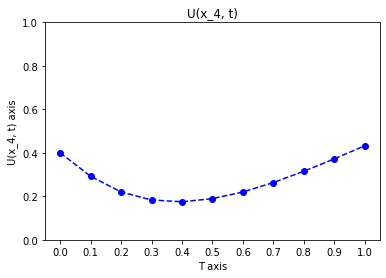

In [52]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_y + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  axes.set_ylim([0, 1])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "blue")
  plt.show()